## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 7
---------------------------------------

GOALS:

1. Answer all the questions from the lecture - we will use the scientists data and the grocery data.
2. Analyze data about College majors - your first EDA! (Think of this as a practice exam.)

----------------------------------------------------------

This homework has **9 Questions** and **A Practice Exam**

NOTE:
The practice exam is intended to give you an idea of what an exam in this class might feel like. Remember you will be expected to work on the exam **independently** and submit your work before we get together to work on the exam in class. **15\% of your Exam grade will come from what you can do independently** so start practicing now and get help if you need it!.

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Lecture Questions

First we will import the data about female scientists.

In [69]:
file1 = 'https://joannabieri.com/introdatascience/data/dates.csv'
DF_dates = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/professions.csv'
DF_professions = pd.read_csv(file2)
file3 = 'https://joannabieri.com/introdatascience/data/works.csv'
DF_works = pd.read_csv(file3)
show(DF_dates)
show(DF_professions)
show(DF_works)

**Q1** Are each of these data sets Tidy? 

**Q2** Do they all contain the same number of observations?

**Q3** What are the five variables? 

**Q4** What variable do they have in common - what can we join **on** 

**(Click Here)**
1. Yes these data sets are tidy because they have no column breaks and are clearly labeled
2. No they do not all have the same about of oberservations 
3.Name, Know_for, profession,birth_year, Death_year
4.we can join on the names of the women in science and the coulmn we would merge is the name column. 

## Combining Three Data Sets

You need to think about the order and whether or not you want to keep the maximum number of names or only keep names that are in all the data frames.

In this case we will try to keep the maximal amount of data - the maximum number of names.

1. Combine the professions and works data
2. Then add the dates data

In [74]:
# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='left')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='left')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Ada Lovelace,Mathematician,first computer algorithm,NaN,NaN
1,Marie Curie,Physicist and Chemist,"theory of radioactivity, discovery of element...",NaN,NaN
2,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0
3,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0
4,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0
5,Rosalind Franklin,Chemist,NaN,1920.0,1958.0
6,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0
7,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN
8,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN
9,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN


**Q5** What, if anything, would change if you switched to how='right'?

**(Click Here)**
if you put how=right in then the data would be merged using the dates of their birth and death year and we would lose two of the women in the data set as we have 2 fewer observations in the dates vs the profession data frames.

## Combining Two Data Sets - You Try

**Q6** Write code that would combine the professions data and the dates data, but drop any names that don't appear in both.

In [79]:
# Your code here
DF_scientists_drop = pd.merge(DF_scientists,DF_dates,on='name',how='inner')
DF_scientists_drop


,name,profession,known_for,birth_year_x,death_year_x,birth_year_y,death_year_y
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0,1897,1984.0
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0,1912,1997.0
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0,1918,2020.0
3,Rosalind Franklin,Chemist,NaN,1920.0,1958.0,1920,1958.0
4,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0,1928,2016.0
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN,1947,NaN
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN,1964,NaN


## Combining Three Data Sets - You Try

**Q7** Try to combine the three data sets together (professions, works, and dates) but instead of doing what we did above, see if you can keep only the names that appeared in all three data sets.

In [82]:
# Your code here
DF_scientists_names = pd.merge(DF_professions,DF_works,on='name',how='inner')
DF_scientists
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='inner')
DF_scientists


,name,profession,known_for,birth_year_x,death_year_x,birth_year_y,death_year_y
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0,1897,1984.0
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0,1912,1997.0
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0,1918,2020.0
3,Rosalind Franklin,Chemist,NaN,1920.0,1958.0,1920,1958.0
4,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0,1928,2016.0
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN,1947,NaN
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN,1964,NaN


## Case study - Grocery Sales

Below you will load some data about grocery sales and see how joining or merging data can help us answer questions.

In [85]:
file1 = 'https://joannabieri.com/introdatascience/data/purchases.csv'
DF_purchases = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/prices.csv'
DF_prices = pd.read_csv(file2)
show(DF_purchases)
show(DF_prices)

## Calculate the total revenue

**Q8** Given the data above find the total revenue.

We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. In this case both data frames have **item** as a column.

Now, think about how to calculate revenue... we need to add up the total money we made, so we need to know the price of each thing sold.

**PAUSE - see if you can write some of the code for this before looking at the cells below**

In [87]:
DF_Total_Revenue = pd.merge(DF_purchases,DF_prices,on='item',how='right')
DF_Total_Revenue

,customer_id,item,price
0,NaN,avocado,0.50
1,1.0,banana,0.15
2,1.0,bread,1.00
3,1.0,milk,0.80
4,2.0,milk,0.80
5,2.0,toilet paper,3.00


In [90]:
DF_Total_Revenue['price'].sum()

6.25

In [92]:
DF_Total_Revenue.groupby(by=['customer_id']).sum()

,item,price
customer_id,,
1.0,bananabreadmilk,1.95
2.0,milktoilet paper,3.80


In [94]:
#

**See the lecture notes if you need heelp figuring this out!**

**Q9** Calculate the revenue per customer? Hint - group by the customer id and then apply the sum().

In [97]:
# Your code here
DF_Total_Revenue.groupby(by=['customer_id']).sum()

,item,price
customer_id,,
1.0,bananabreadmilk,1.95
2.0,milktoilet paper,3.80


# Practice Exam - EDA - College Majors

Your solutions should include code written to answer the questions AND words describing the results. For each problem:

1. Write code to get the answers. It is okay to copy and paste from our lecture notes or your homework assignments.
2. Describe what the code output is telling you.
3. Explain any interesting aspects of your results.

------------------------
-------------------------

The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [101]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

In [102]:
DF_raw

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables? 
* How man observations? 
* Are the variables categorical or numerical? 
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


there are 21 variables, there are 173 observations, there is a mix of categorical and numerical. I know what all the varibles
mean

In [108]:
#

In [110]:
#

**(Click Here to Explain your Results)**
there are 21 variables. 
there are 173 observations. 
there is a mix of categorical and numerical values in the variables. 
All of the variables seem pretty straight forward and I understand them all. 

### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [114]:
my_columns = ['Major','Unemployment_rate']
DF_raw[my_columns].sort_values('Unemployment_rate')

,Major,Unemployment_rate
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,0.000000
73,MILITARY TECHNOLOGIES,0.000000
83,BOTANY,0.000000
52,MATHEMATICS AND COMPUTER SCIENCE,0.000000
112,SOIL SCIENCE,0.000000
...,...,...
29,PUBLIC POLICY,0.128426
170,CLINICAL PSYCHOLOGY,0.149048
84,COMPUTER NETWORKING AND TELECOMMUNICATIONS,0.151850
89,PUBLIC ADMINISTRATION,0.159491


to find which major had the lowest unemployment rate i used the my columns = to tell python i only want to look at the major 
and the unemployment rate and then I used the sort command and told python to sort the majors by unemployment. if I wanted
highest to lowest I could have given it ascening is false so that i have the highest to lowest unemployment. According to this 
data frame the major with the lowest unemployment rate is educational administration and supervison,botany,military tech,math and comp sci, and soil sci. 5 majors have 0 unemployment rate.

In [118]:
#Which major has the highest percentage of women? 
my_columns = ['Major','Women']
DF_raw[my_columns].sort_values('Women',ascending=False)

#first I told python to focus just on the major and women columns and then i used the sort values command to tell it to sort 
#from most women to least women. I think that i need to divide the women column by the total column to find the percentage not 
#just the number of women I am just not quite sure how to type that in. from this data set it looks like psychology has the most

,Major,Women
145,PSYCHOLOGY,307087.0
34,NURSING,187621.0
123,BIOLOGY,168947.0
138,ELEMENTARY EDUCATION,157833.0
76,BUSINESS MANAGEMENT AND ADMINISTRATION,156118.0
...,...,...
2,METALLURGICAL ENGINEERING,131.0
52,MATHEMATICS AND COMPUTER SCIENCE,109.0
1,MINING AND MINERAL ENGINEERING,77.0
73,MILITARY TECHNOLOGIES,0.0


first I told python to focus just on the major and women columns and then i used the sort values command to tell it to sort 
from most women to least women. I think that i need to divide the women column by the total column to find the percentage not 
just the number of women I am just not quite sure how to type that in. from this data set it looks like psychology has the most

In [136]:
#
Some_cols=['Total','Major_category']
DF_raw[Some_cols].groupby('Major_category').describe()

Total                                \
                                    count           mean            std   
Major_category                                                            
Agriculture & Natural Resources       9.0    8402.222222    7135.038626   
Arts                                  8.0   44641.250000   33635.404025   
Biology & Life Science               14.0   32418.714286   72233.366437   
Business                             13.0  100182.769231  111655.873560   
Communications & Journalism           4.0   98150.250000   77782.804648   
Computers & Mathematics              11.0   27182.545455   39493.602987   
Education                            16.0   34945.562500   49464.706843   
Engineering                          29.0   18537.344828   25231.657274   
Health                               12.0   38602.500000   54985.649362   
Humanities & Liberal Arts            15.0   47564.533333   53315.821235   
Industrial Arts & Consumer Services   7.0   32827.428571   45004.155763   
Interdisciplinary                     1.0   12296.000000            NaN   
Law & Public Policy                   5.0   35821.400000   65557.338070   
Physical Sciences                    10.0   18547.900000   25875.330338   
Psychology & Social Work              9.0   53445.222222  128654.924027   
Social Science                        9.0   58885.111111   67698.828368   

                                                                            \
                                         min       25%      50%        75%   
Major_category                                                               
Agriculture & Natural Resources        685.0   2439.00   7416.0   13773.00   
Arts                                  3340.0  16795.25  41005.0   64084.75   
Biology & Life Science                1329.0   4975.50  12184.5   21120.00   
Business                              3777.0  17947.00  25894.0  198633.00   
Communications & Journalism          52824.0  53077.50  62890.5  107963.25   
Computers & Mathematics                609.0   5595.00   8066.0   27366.50   
Education                              804.0   9233.25  18661.5   31398.50   
Engineering                            720.0   2906.00   4790.0   18968.00   
Health                               11123.0  15282.00  19322.0   34769.00   
Humanities & Liberal Arts             3079.0  17777.00  30207.0   51530.00   
Industrial Arts & Consumer Services    124.0   6472.50  15150.0   38249.50   
Interdisciplinary                    12296.0  12296.00  12296.0   12296.00   
Law & Public Policy                   1148.0   5629.00   5978.0   13528.00   
Physical Sciences                     1436.0   2012.50   3230.5   26849.50   
Psychology & Social Work              1386.0   2854.00   4626.0    9628.00   
Social Science                        3283.0  12920.00  19879.0  115433.00   

                                               
                                          max  
Major_category                                 
Agriculture & Natural Resources       21573.0  
Arts                                 103480.0  
Biology & Life Science               280709.0  
Business                             329927.0  
Communications & Journalism          213996.0  
Computers & Mathematics              128319.0  
Education                            170862.0  
Engineering                           91227.0  
Health                               209394.0  
Humanities & Liberal Arts            194673.0  
Industrial Arts & Consumer Services  125074.0  
Interdisciplinary                     12296.0  
Law & Public Policy                  152824.0  
Physical Sciences                     66530.0  
Psychology & Social Work             393735.0  
Social Science                       182621.0

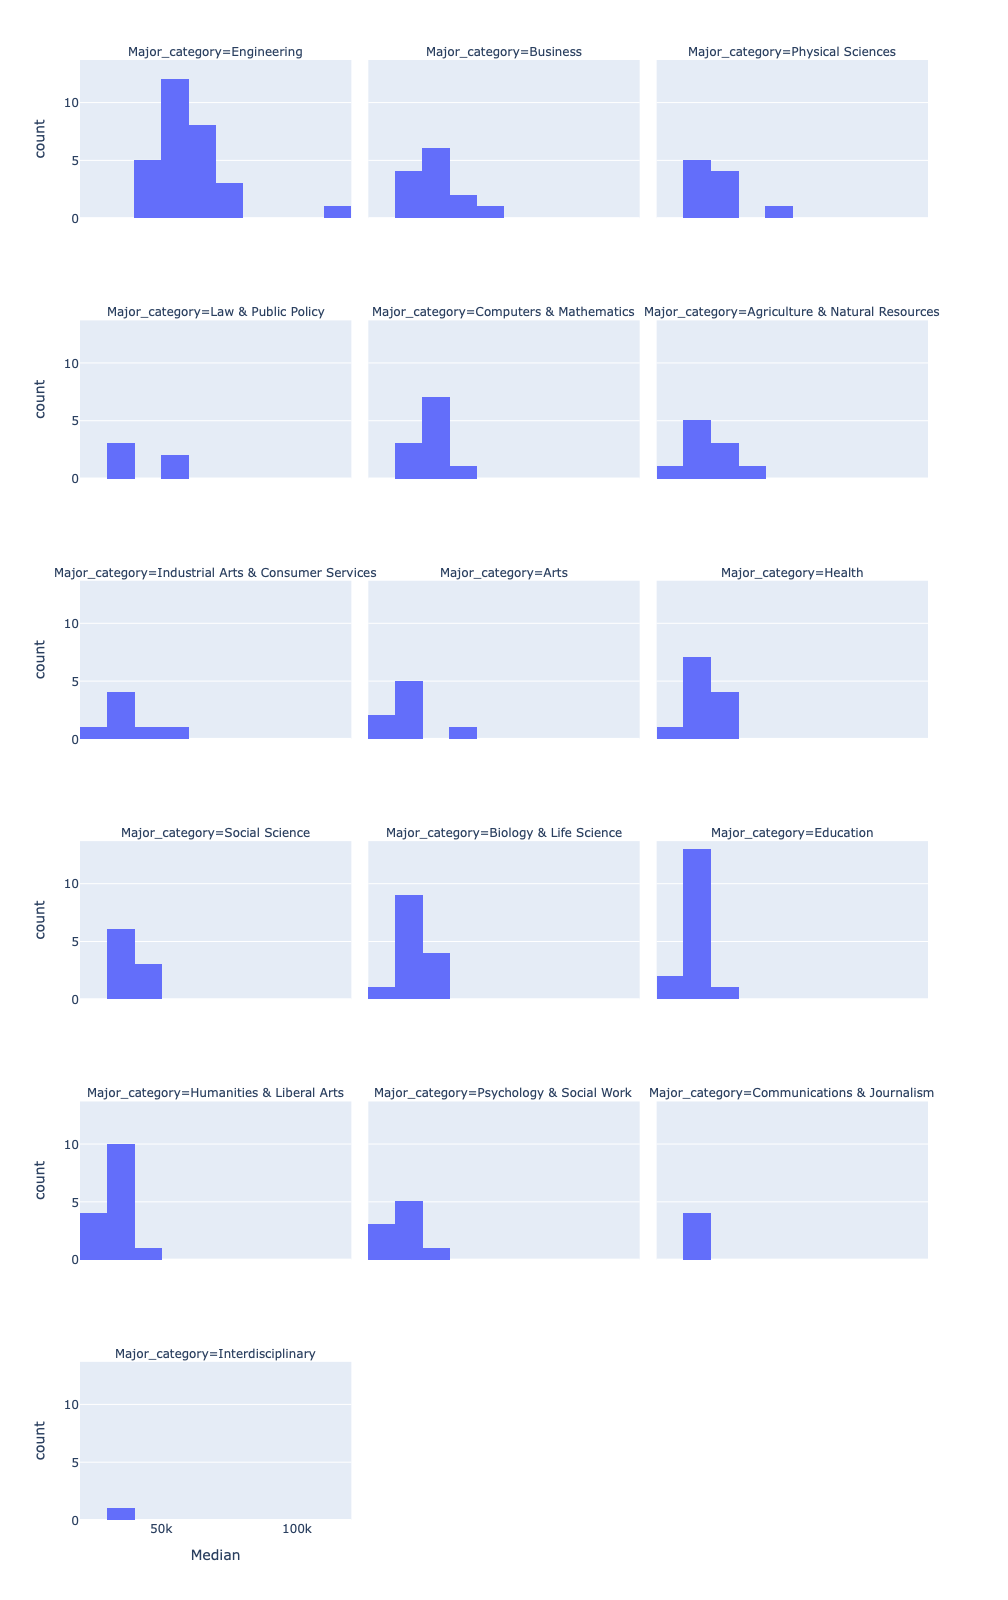

In [164]:
fig = px.histogram(DF_raw,
                  x='Median',
                   nbins=15,
                  facet_col='Major_category',
                  facet_col_wrap=3)
fig.update_layout(autosize = False,
                  width=600,
                  height=1600)
fig.show()

In [172]:
#Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?
my_columns=['Major_category','Median']
DF_raw[my_columns].groupby('Major_category').mean()

,Median
Major_category,
Agriculture & Natural Resources,36900.000000
Arts,33062.500000
Biology & Life Science,36421.428571
Business,43538.461538
Communications & Journalism,34500.000000
Computers & Mathematics,42745.454545
Education,32350.000000
Engineering,57382.758621
Health,36825.000000


**(Click Here to Explain your Results)**

### 3. More complicated questions

* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories
    
  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

In [21]:
#

In [22]:
#

In [23]:
#

**(Click Here to Explain your Results)**

### 4. Ask a question of interest to you.

In [24]:
#

**(Click Here to Explain your Results)**